In [2]:
# the Goal is the predict the time of reading each articel based features
# 2 new created features and added to the base line
# classification on feature 
# use the Linear Regression to train the model
# use RMSE to evaluate the model
# at lean test the model

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('medium_data.csv')
len(df)

2498

In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [30]:
df.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/not-all-rainbow...,not_all_rainbows_and_sunshine:_the_darker_side...,part_1:_the_risks_and_ethical issues…,453.0,11,9,towards_data_science,27-01-2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,ethics_in_ai:_potential_root_causes_for_biased...,an_alternative_approach_to_understanding_bias_...,311.0,3,12,towards_data_science,27-01-2023
2,3,https://towardsdatascience.com/python-tuple-th...,"python_tuple,_the_whole_truth_and_only_the_tru...",NaN,188.0,0,24,towards_data_science,27-01-2023
3,4,https://towardsdatascience.com/dates-and-subqu...,dates_and_subqueries_in sql,working_with_dates_in sql,15.0,1,4,towards_data_science,27-01-2023
4,5,https://towardsdatascience.com/temporal-differ...,temporal_differences_with_python:_first_sample...,NaN,10.0,0,13,towards_data_science,27-01-2023


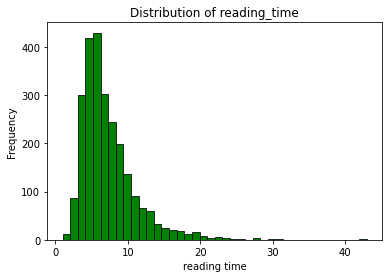

In [72]:
plt.figure(figsize=(6, 4))

sns.histplot(df.reading_time, bins=40, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('reading time')
plt.title('Distribution of reading_time')

plt.show()

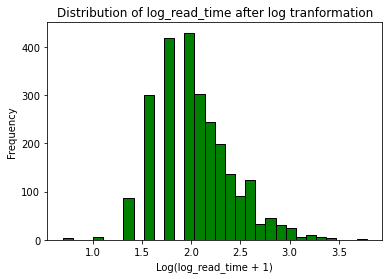

In [73]:
log_read_time = np.log1p(df.reading_time)

plt.figure(figsize=(6, 4))

sns.histplot(log_read_time, bins=30, color='green', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(log_read_time + 1)')
plt.title('Distribution of log_read_time after log tranformation')

plt.show()

In [74]:
df.isnull().sum()

id                 0
url                0
title              0
subtitle           0
claps              0
responses          0
reading_time       0
publication        0
date               0
title_length       0
subtitle_length    0
dtype: int64

In [75]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [76]:
y_train_orig = df_train.reading_time.values
y_val_orig = df_val.reading_time.values
y_test_orig = df_test.reading_time.values

y_train = np.log1p(df_train.reading_time.values)
y_val = np.log1p(df_val.reading_time.values)
y_test = np.log1p(df_test.reading_time.values)

In [36]:
del df_train['reading_time']
del df_val['reading_time']
del df_test['reading_time']

In [40]:
df.claps = df.claps.fillna(0).round(0)
df.subtitle = df.subtitle.fillna(0)

df.isnull().sum()

id              0
url             0
title           0
subtitle        0
claps           0
responses       0
reading_time    0
publication     0
date            0
title_length    0
dtype: int64

In [77]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [66]:
df['title_length'] = df['title'].apply(lambda x: len(x))

In [67]:
#  because some values are 0 
df['subtitle_length'] = df['subtitle'].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [68]:
df.to_csv('updated_medium_data.csv', index=False)
df.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date,title_length,subtitle_length
0,1,https://towardsdatascience.com/not-all-rainbow...,not_all_rainbows_and_sunshine:_the_darker_side...,part_1:_the_risks_and_ethical issues…,453.0,11,9,towards_data_science,27-01-2023,57,37
1,2,https://towardsdatascience.com/ethics-in-ai-po...,ethics_in_ai:_potential_root_causes_for_biased...,an_alternative_approach_to_understanding_bias_...,311.0,3,12,towards_data_science,27-01-2023,57,53
2,3,https://towardsdatascience.com/python-tuple-th...,"python_tuple,_the_whole_truth_and_only_the_tru...",0,188.0,0,24,towards_data_science,27-01-2023,64,0
3,4,https://towardsdatascience.com/dates-and-subqu...,dates_and_subqueries_in sql,working_with_dates_in sql,15.0,1,4,towards_data_science,27-01-2023,27,25
4,5,https://towardsdatascience.com/temporal-differ...,temporal_differences_with_python:_first_sample...,0,10.0,0,13,towards_data_science,27-01-2023,85,0


In [78]:
# create the baseline features
# base = ['responses','claps','subtitle_length']
# base = ['responses','claps','title_length']
# base = ['responses','title_length','subtitle_length']
base = ['claps','title_length','subtitle_length']
# base = ['responses','claps'] # inter : from the grafic seems bas

In [79]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [81]:
# KeyError: "['subtitle_length'] not in index" because of the X = niot updated to the new added features
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [83]:
y_pred = w_0 + X_train.dot(w)

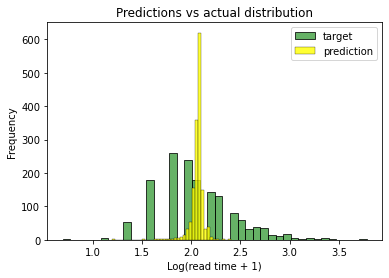

In [86]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='green', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='yellow', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(read time + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [88]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [90]:
rmse(y_train, y_pred)

0.3815073277500142

In [92]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [94]:
rmse(y_val, y_pred)

0.3603388022074292

In [107]:
# preapre feature
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    ###### singular Matrix !!!! #####
    #### using the classification we the rmse reduce from 0.36 to 0.32
    for v in ['towards_data_science', 'the_startup', 'the_writing_cooperative', 'the_writing_cooperative']:
        feature = 'is_publication_%s' % v
        df[feature] = (df['publication'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [108]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.3230784392395426
0.0001 0.3230784065954697
 0.001 0.32307811034062556
  0.01 0.3230751542716838
   0.1 0.3230462411826243
     1 0.32281989885400375
     5 0.3230016535759132
    10 0.3252487229974348


In [109]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [111]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [112]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.3230751542716838
test: 0.3143803584850884


In [131]:
# use the mode fpr the test dataset
i = 10
ad = df_test.iloc[i].to_dict()
ad

{'id': 27,
 'url': 'https://medium.com/swlh/how-i-balanced-a-side-hustle-with-a-9-5-until-i-quit-for-4-hour-workdays-98a10b9135b7',
 'title': 'how_i_balanced_a_side_hustle_with_a_9–5_until_i_quit_for_4-hour\xa0workdays',
 'subtitle': 'here_are_various_tips_for\xa0you.',
 'claps': 658.0,
 'responses': 8,
 'reading_time': 4,
 'publication': 'the_startup',
 'date': '04-03-2023',
 'title_length': 72,
 'subtitle_length': 30}

In [133]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

5.335772683561526

In [ ]:
## need to set more features##
# the predicted values are not very accurate ##